# Basic Pre-Processing of Electricity Consumption Dataset


In [417]:
import pandas as pd

In [418]:
df = pd.read_excel("Full Data.xlsx")

In [419]:
df.head()

,DATE,(NET_x000D_CONS.),MAXI._x000D_DEMAND_x000D_MET_x000D_DURING_x000D_THE DAY,TIME OF_x000D_OCCUR-_x000D_RENCE OF_x000D_MAX_x000D_DEMAND,SHEDDING_x000D_AT THIS_x000D_TIME,UN-REST-_x000D_RICTED_x000D_DEMAND,MAXIMUM_x000D_UN-REST-_x000D_RICTED_x000D_DEMAND_x000D_DURING_x000D_THE DAY,TIME OF_x000D_MAX._x000D_UN-REST._x000D_DEMAND,DEMAND_x000D_AT THAT_x000D_TIME,SHEDDING_x000D_AT THAT_x000D_TIME
0,01.Jan.18,64.082,4042.0,10:34:14,12.0,4054.0,4054.0,10:34:14,4042.0,12.0
1,02.Jan.18,64.375,4021.0,10:32:29,0.0,4021.0,4021.0,10:32:29,4021.0,0.0
2,03.Jan.18,67.302,4243.0,10:01:30,0.0,4243.0,4243.0,10:01:30,4243.0,0.0
3,04.Jan.18,70.564,4073.0,10:32:40,0.0,4073.0,4073.0,10:32:40,4073.0,0.0
4,05.Jan.18,72.199,4464.0,09:56:11,0.0,4464.0,4464.0,09:56:11,4464.0,0.0


In [420]:
# dropping all the rows with missing values
df.dropna(inplace=True)

In [421]:
# code to pre-process the DATE column
import pandas as pd

# Function to convert the specific date formats to standard datetime format
def convert_date_format(date_str):
    try:
        # Check if the date is in the format "DD.MM.YY"
        if pd.to_datetime(date_str, format='%d.%m.%y', errors='coerce') is not pd.NaT:
            return pd.to_datetime(date_str, format='%d.%m.%y').strftime('%d-%m-%Y')
        # Check if the date is in the format "DD.Mmm.YY"
        elif pd.to_datetime(date_str, format='%d.%b.%y', errors='coerce') is not pd.NaT:
            return pd.to_datetime(date_str, format='%d.%b.%y').strftime('%d-%m-%Y')
        else:
            return date_str
    except Exception:
        return date_str

# Apply the function to the DATE column
df['DATE'] = df['DATE'].apply(convert_date_format)

# Convert the DATE column to datetime64[ns] format
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y', errors='coerce')

# Display the updated DataFrame
df

,DATE,(NET_x000D_CONS.),MAXI._x000D_DEMAND_x000D_MET_x000D_DURING_x000D_THE DAY,TIME OF_x000D_OCCUR-_x000D_RENCE OF_x000D_MAX_x000D_DEMAND,SHEDDING_x000D_AT THIS_x000D_TIME,UN-REST-_x000D_RICTED_x000D_DEMAND,MAXIMUM_x000D_UN-REST-_x000D_RICTED_x000D_DEMAND_x000D_DURING_x000D_THE DAY,TIME OF_x000D_MAX._x000D_UN-REST._x000D_DEMAND,DEMAND_x000D_AT THAT_x000D_TIME,SHEDDING_x000D_AT THAT_x000D_TIME
0,2018-01-01,64.082,4042.0,10:34:14,12.0,4054.0,4054.0,10:34:14,4042.0,12.0
1,2018-01-02,64.375,4021.0,10:32:29,0.0,4021.0,4021.0,10:32:29,4021.0,0.0
2,2018-01-03,67.302,4243.0,10:01:30,0.0,4243.0,4243.0,10:01:30,4243.0,0.0
3,2018-01-04,70.564,4073.0,10:32:40,0.0,4073.0,4073.0,10:32:40,4073.0,0.0
4,2018-01-05,72.199,4464.0,09:56:11,0.0,4464.0,4464.0,09:56:11,4464.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2150,2024-06-26,156.264,7771.0,15:10:18,9.0,7780.0,7771.0,15:10:18,7780.0,9.0
2151,2024-06-27,142.034,7153.0,00:00:14,0.0,7153.0,7153.0,00:00:14,7153.0,0.0
2152,2024-06-28,127.544,6716.0,00:00:12,0.0,6716.0,6716.0,00:00:12,6716.0,0.0
2153,2024-06-29,128.707,6220.0,14:35:15,0.0,6220.0,6220.0,14:35:15,6220.0,0.0


In [422]:
# Basic Feature Engineering from DATE column

df['day_of_week'] = df['DATE'].dt.dayofweek
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year
df['is_weekend'] = df['DATE'].dt.dayofweek >= 5

In [423]:
# dropping all the rows with missing values
df.dropna(inplace=True)

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2150 entries, 0 to 2154
Data columns (total 14 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   DATE                                                                         2150 non-null   datetime64[ns]
 1   (NET_x000D_CONS.)                                                            2150 non-null   float64       
 2   MAXI._x000D_DEMAND_x000D_MET_x000D_DURING_x000D_THE DAY                      2150 non-null   float64       
 3   TIME OF_x000D_OCCUR-_x000D_RENCE OF_x000D_MAX_x000D_DEMAND                   2150 non-null   object        
 4   SHEDDING_x000D_AT THIS_x000D_TIME                                            2150 non-null   float64       
 5   UN-REST-_x000D_RICTED_x000D_DEMAND                                           2150 non-null   float64  

In [425]:
# selecting the useful features from df
final_df = df[['DATE', 'MAXIMUM_x000D_UN-REST-_x000D_RICTED_x000D_DEMAND_x000D_DURING_x000D_THE DAY', 'day_of_week', 'month', 'year', 'is_weekend']]

In [426]:
final_df.head()

,DATE,MAXIMUM_x000D_UN-REST-_x000D_RICTED_x000D_DEMAND_x000D_DURING_x000D_THE DAY,day_of_week,month,year,is_weekend
0,2018-01-01,4054.0,0.0,1.0,2018.0,False
1,2018-01-02,4021.0,1.0,1.0,2018.0,False
2,2018-01-03,4243.0,2.0,1.0,2018.0,False
3,2018-01-04,4073.0,3.0,1.0,2018.0,False
4,2018-01-05,4464.0,4.0,1.0,2018.0,False


# Basic Pre-Processing of Weather Data


In [427]:
feature_df = pd.read_excel("features.xlsx")
feature_df.rename(columns={'datetime': 'DATE'}, inplace=True)

In [428]:
feature_df.head()

,DATE,temp,feelslike,dew,humidity,precip,windspeed,winddir,sea level pressure,visibility,solarenergy,uvindex,moonphase
0,2023-01-01,13.4,13.3,9.6,79.8,0.0,9.4,265.7,1020.6,1.7,12.5,6,0.30
1,2023-01-02,12.4,12.4,10.3,87.9,0.0,9.4,170.2,1021.4,0.8,13.0,6,0.34
2,2023-01-03,11.2,11.0,8.7,85.6,0.0,9.4,287.2,1022.2,0.8,13.1,6,0.37
3,2023-01-04,9.6,9.0,7.9,90.1,0.0,11.2,290.2,1022.2,1.0,13.2,6,0.41
4,2023-01-05,9.7,9.4,6.1,83.0,0.0,8.7,280.0,1023.7,3.6,13.4,6,0.44


In [429]:
# Merge the two DataFrames on the 'DATE' column
final_df = pd.merge(final_df, feature_df, on='DATE', how='inner')

window_size = 7

# Add lagging average (rolling mean)
final_df['lagging_average'] = final_df['MAXIMUM_x000D_UN-REST-_x000D_RICTED_x000D_DEMAND_x000D_DURING_x000D_THE DAY'].rolling(window=window_size).mean()

final_df['previous_difference'] = final_df['MAXIMUM_x000D_UN-REST-_x000D_RICTED_x000D_DEMAND_x000D_DURING_x000D_THE DAY'] - final_df['MAXIMUM_x000D_UN-REST-_x000D_RICTED_x000D_DEMAND_x000D_DURING_x000D_THE DAY'].shift(1)

final_df.head(10)

,DATE,MAXIMUM_x000D_UN-REST-_x000D_RICTED_x000D_DEMAND_x000D_DURING_x000D_THE DAY,day_of_week,month,year,is_weekend,temp,feelslike,dew,humidity,precip,windspeed,winddir,sea level pressure,visibility,solarenergy,uvindex,moonphase,lagging_average,previous_difference
0,2018-01-01,4054.0,0.0,1.0,2018.0,False,12.5,12.4,9.0,82.5,0.0,9.4,296.6,1014.3,0.7,14.1,6,0.47,NaN,NaN
1,2018-01-02,4021.0,1.0,1.0,2018.0,False,11.8,11.5,9.2,85.5,0.0,9.4,287.8,1014.8,0.6,14.1,6,0.50,NaN,-33.0
2,2018-01-03,4243.0,2.0,1.0,2018.0,False,11.1,10.6,8.8,86.6,0.0,11.2,270.8,1015.4,0.6,14.6,6,0.54,NaN,222.0
3,2018-01-04,4073.0,3.0,1.0,2018.0,False,10.9,10.6,8.3,86.2,0.0,13.0,120.0,1015.5,0.5,14.7,6,0.57,NaN,-170.0
4,2018-01-05,4464.0,4.0,1.0,2018.0,False,11.7,11.2,8.0,81.0,0.0,11.2,112.3,1015.0,0.9,14.4,6,0.61,NaN,391.0
5,2018-01-06,4185.0,5.0,1.0,2018.0,True,11.2,11.1,7.3,79.6,0.0,11.2,277.5,1014.1,0.7,14.5,6,0.64,NaN,-279.0
6,2018-01-07,4016.0,6.0,1.0,2018.0,True,12.1,11.7,6.8,73.2,0.0,20.5,270.5,1014.9,1.5,15.1,7,0.67,4150.857143,-169.0
7,2018-01-08,4290.0,0.0,1.0,2018.0,False,12.3,12.0,6.2,70.0,0.0,13.0,265.6,1016.8,1.4,15.2,7,0.71,4184.571429,274.0
8,2018-01-09,4225.0,1.0,1.0,2018.0,False,12.6,12.6,7.1,72.2,0.0,16.6,274.5,1018.8,1.4,15.3,7,0.75,4213.714286,-65.0
9,2018-01-10,4241.0,2.0,1.0,2018.0,False,13.8,13.4,7.1,68.1,0.0,23.0,269.7,1018.4,1.6,15.4,7,0.77,4213.428571,16.0


In [430]:
initial_final=final_df

# Pre-Processing of this final Dataset (Encoding)


In [431]:
from sklearn.preprocessing import OneHotEncoder

In [432]:
import pandas as pd
import numpy as np

# Assuming df is your pandas DataFrame with 'temperature' and 'dew_point' columns in °C

# Define a function to calculate RH
def calculate_relative_humidity(temp, dew_point):
    a = 17.625
    b = 243.04
    alpha_dew = (a * dew_point) / (b + dew_point)
    alpha_temp = (a * temp) / (b + temp)
    RH = 100 * (np.exp(alpha_dew) / np.exp(alpha_temp))
    return RH

# Apply the function to your dataframe
final_df['relative_humidity'] = calculate_relative_humidity(final_df['temp'], final_df['dew'])

# Display the first few rows to check the result
print(df.head())


        DATE  (NET_x000D_CONS.)  \
0 2018-01-01             64.082   
1 2018-01-02             64.375   
2 2018-01-03             67.302   
3 2018-01-04             70.564   
4 2018-01-05             72.199   

   MAXI._x000D_DEMAND_x000D_MET_x000D_DURING_x000D_THE DAY  \
0                                             4042.0         
1                                             4021.0         
2                                             4243.0         
3                                             4073.0         
4                                             4464.0         

  TIME OF_x000D_OCCUR-_x000D_RENCE OF_x000D_MAX_x000D_DEMAND  \
0                                           10:34:14           
1                                           10:32:29           
2                                           10:01:30           
3                                           10:32:40           
4                                           09:56:11           

   SHEDDING_x000D_AT THIS_x000D

In [433]:
def return_sine(month: int):
    month_angle= np.pi *month/6 
    return np.sin(month_angle)

final_df['month_cyclic']=return_sine(df['month'])

In [434]:
i=0
for element in final_df['precip']:
    if element>0:
        final_df['precip'][i]=1
    i+=1

C:\Users\anasm\AppData\Local\Temp\ipykernel_32684\1304705405.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  final_df['precip'][i]=1
C:\Users\anasm\AppData\Local\Temp\ipykernel_32684\1304705405.py:4: SettingWithCopyWarning: 
A value is t

In [435]:
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

final_df=final_df.dropna()

# Fit and transform the 'is_weekend' column
encoded = encoder.fit_transform(final_df[['is_weekend']])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['is_weekend']))

# Concatenate the encoded features with the original DataFrame
df_encoded = pd.concat([final_df, encoded_df], axis=1)

# Drop the original 'is_weekend' column if it's no longer needed
df_encoded = df_encoded.drop(columns=['is_weekend'])

# Display the resulting DataFrame
df_encoded.head()

,DATE,MAXIMUM_x000D_UN-REST-_x000D_RICTED_x000D_DEMAND_x000D_DURING_x000D_THE DAY,day_of_week,month,year,temp,feelslike,dew,humidity,precip,...,sea level pressure,visibility,solarenergy,uvindex,moonphase,lagging_average,previous_difference,relative_humidity,month_cyclic,is_weekend_True
6,2018-01-07,4016.0,6.0,1.0,2018.0,12.1,11.7,6.8,73.2,0.0,...,1014.9,1.5,15.1,7.0,0.67,4150.857143,-169.0,70.036223,0.5,1.0
7,2018-01-08,4290.0,0.0,1.0,2018.0,12.3,12.0,6.2,70.0,0.0,...,1016.8,1.4,15.2,7.0,0.71,4184.571429,274.0,66.326398,0.5,1.0
8,2018-01-09,4225.0,1.0,1.0,2018.0,12.6,12.6,7.1,72.2,0.0,...,1018.8,1.4,15.3,7.0,0.75,4213.714286,-65.0,69.181809,0.5,0.0
9,2018-01-10,4241.0,2.0,1.0,2018.0,13.8,13.4,7.1,68.1,0.0,...,1018.4,1.6,15.4,7.0,0.77,4213.428571,16.0,63.972269,0.5,0.0
10,2018-01-11,4205.0,3.0,1.0,2018.0,13.8,13.4,6.9,66.7,0.0,...,1016.9,1.8,15.3,7.0,0.81,4232.285714,-36.0,63.101631,0.5,0.0


In [436]:
df_encoded['windchill'] = 13.12 + 0.6215 * df_encoded['temp'] - 11.37 * (df_encoded['windspeed'] ** 0.16) + 0.3965 * df_encoded['temp'] * (df_encoded['windspeed']**0.16)
df_encoded.drop(columns=['temp', 'humidity', 'dew',  'month', 'is_weekend_True'], inplace=True)
df_encoded.dropna(inplace=True)
df_encoded.columns

Index(['DATE',
       'MAXIMUM_x000D_UN-REST-_x000D_RICTED_x000D_DEMAND_x000D_DURING_x000D_THE DAY',
       'day_of_week', 'year', 'feelslike', 'precip', 'windspeed', 'winddir',
       'sea level pressure', 'visibility', 'solarenergy', 'uvindex',
       'moonphase', 'lagging_average', 'previous_difference',
       'relative_humidity', 'month_cyclic', 'windchill'],
      dtype='object')

In [437]:
print(final_df['moonphase'].max(), final_df['moonphase'].min())

0.98 0.0


In [438]:
df_encoded.to_csv('final features.csv')

In [439]:
# dropping the 'DATE' column

df_encoded = df_encoded.drop(columns=['DATE'])

In [440]:
df_encoded = df_encoded.rename(columns={'MAXIMUM_x000D_UN-REST-_x000D_RICTED_x000D_DEMAND_x000D_DURING_x000D_THE DAY': 'peak_demand'})

# Temproary Training

In [441]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [442]:
# Split into features and target
X = df_encoded.drop("peak_demand", axis=1)
y = df_encoded["peak_demand"]
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalization

In [443]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [444]:
# R2 score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
    
# Make predictions
predictions = model.predict(X_test)
    
# Evaluate the model with accuracy for classification
accuracy = r2_score(y_test, predictions)
print(f"Random Forest Classification Accuracy: {accuracy:.4f}")

Random Forest Classification Accuracy: 0.9510


In [445]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor  # You can use any other model
from sklearn.metrics import make_scorer

# Define the model
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(model, X, y, cv=kf, scoring='r2').mean()

print(cv_results)

0.9480124527247643


In [446]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100)
model.fit(X_train, y_train)
    
# Make predictions
predictions = model.predict(X_test)
    
# Evaluate the model using mean squared error for regression
r2 = r2_score(y_test, predictions)
print(f"XGBoost Regression MSE: {r2:.4f}")

XGBoost Regression MSE: 0.9530


In [447]:
from sklearn.model_selection import cross_val_score, KFold

# Define the model
model = XGBRegressor(n_estimators = 100, random_state = 2)

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(model, X, y, cv=kf, scoring='r2').mean()

print(cv_results)

0.9548786087350395


# Starting the training model


In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [28]:
# Split into features and target
X = df_encoded.drop("peak_demand", axis=1)
y = df_encoded["peak_demand"]
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_test

,day_of_week,month,year,feelslike,precip,windspeed,winddir,sea level pressure,visibility,solarenergy,uvindex,moonphase,lagging_average,previous_difference,relative_humidity,is_weekend_True
863,5.0,6.0,2020.0,38.5,0.030,16.6,109.0,998.9,2.8,21.0,8.0,0.75,5107.857143,-82.0,57.147488,0.0
1486,3.0,3.0,2022.0,21.7,0.000,16.6,253.1,1015.3,3.0,18.0,8.0,0.02,3761.428571,-104.0,59.256503,0.0
62,6.0,3.0,2018.0,22.9,0.000,22.3,300.7,1009.2,3.0,18.8,8.0,0.57,3189.285714,115.0,51.968481,1.0
1106,4.0,2.0,2021.0,18.1,0.000,11.2,282.5,1015.1,0.8,15.5,6.0,0.00,4037.428571,256.0,76.978231,0.0
865,0.0,6.0,2020.0,40.7,0.000,16.6,247.7,998.4,4.0,26.4,9.0,0.81,5475.285714,234.0,43.136144,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,5.0,12.0,2021.0,15.5,0.000,13.0,271.8,1019.2,2.5,14.2,6.0,0.25,3712.142857,-259.0,62.211871,0.0
1240,5.0,6.0,2021.0,35.1,4.253,22.1,279.2,1002.6,2.8,23.8,9.0,0.55,5912.714286,-362.0,58.194021,0.0
338,2.0,12.0,2018.0,16.9,0.000,8.5,300.1,1015.1,1.9,14.2,6.0,0.93,3474.857143,37.0,69.110901,0.0
1340,0.0,10.0,2021.0,36.0,0.000,14.8,245.9,1005.7,3.9,18.2,8.0,0.93,5178.142857,312.0,70.402903,1.0


# Training Random Forest Regressor

In [75]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
# printing the best parameters found
print("Best parameters:", best_params)

# Training the model with the best parameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

# predicting the values using the best model
y_pred = best_rf.predict(X_test)

# Evaluating the model using R-squared score
r2 = r2_score(y_test, y_pred)

print("R-squared score:", r2)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
R-squared score: 0.9123929322291021


# Training a XG Boost model

In [76]:
import xgboost as xgb

# Define the parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBoost Regressor
xgb_reg = xgb.XGBRegressor()

# Setup GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_reg, param_grid=xgb_param_grid, cv=5, scoring='r2')
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters
xgb_best_params = xgb_grid_search.best_params_
print("Best parameters:", xgb_best_params)

# Initialize XGBoost Regressor with the best parameters
xgb_best_reg = xgb.XGBRegressor(**xgb_best_params)

# Fit the model
xgb_best_reg.fit(X_train, y_train)

# Predict on the test set
xgb_y_pred = xgb_best_reg.predict(X_test)

# Evaluate the model using R-squared score
xgb_r2 = r2_score(y_test, xgb_y_pred)
print("R-squared score:",xgb_r2)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 1.0}
R-squared score: 0.9323878058605914


<Axes: >

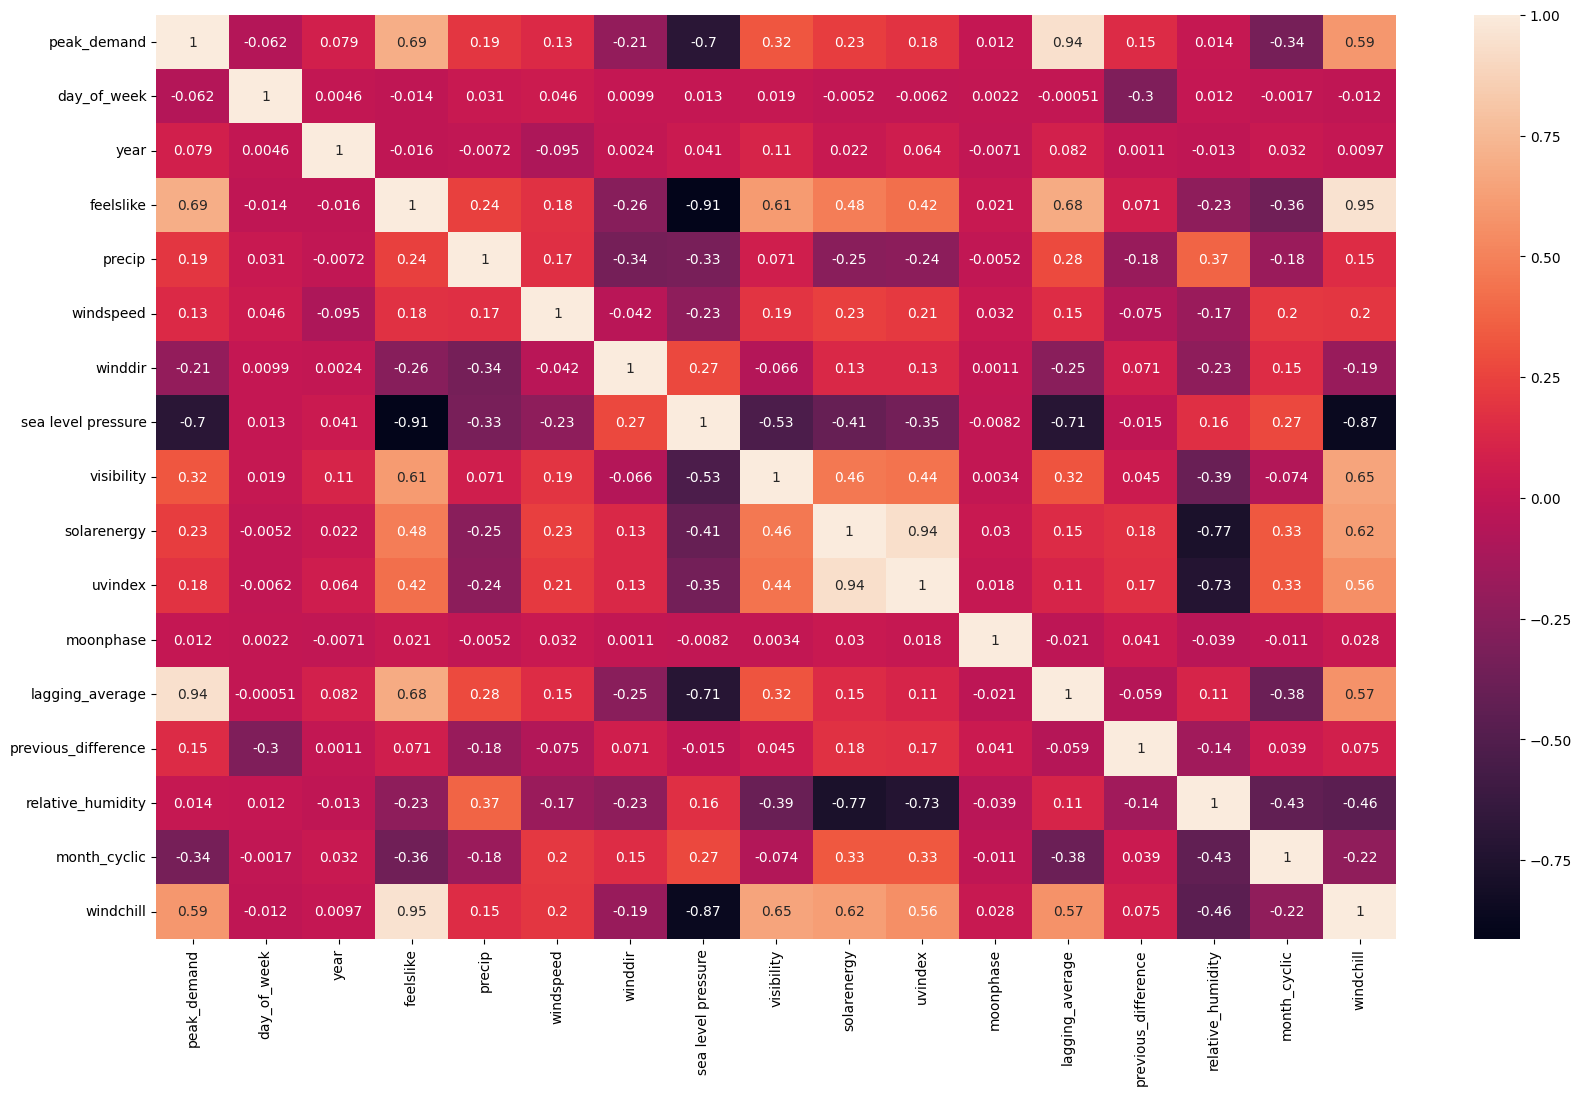

In [448]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
sns.heatmap(df_encoded.corr(), annot=True)